In [7]:
import re, os
# import matplotlib
# matplotlib.use('agg')
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
from scipy.stats import entropy

def get_train_acc(log_file):
    train_acc_list = []
    log = open(log_file,'r')
    for line in log.readlines():
        match = re.findall('rain_acc \d+.\d+', line)
        if match:
            train_acc = match[0].split(' ')[1]
            train_acc_list.append(float(train_acc))
        
    return train_acc_list

def get_valid_acc(log_file):
    valid_acc_list = []
    log = open(log_file,'r')
    for line in log.readlines():
        match = re.findall('alid_acc.? \d+.\d+', line)
        if match:
            valid_acc = match[0].split(' ')[1]
            valid_acc_list.append(float(valid_acc))
        
    return valid_acc_list

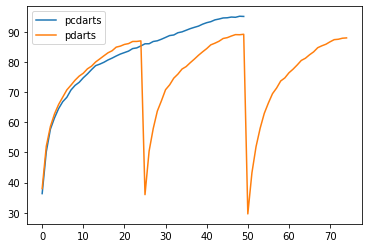

In [27]:
pcdarts_search = get_train_acc('./PC-DARTS/begin_unroll/log.txt')
pdarts_search = get_train_acc('./PDARTS/begin_unroll/log.txt')

plt.plot(pcdarts_search, label='pcdarts')
plt.plot(pdarts_search, label='pdarts')

plt.legend()

96.66

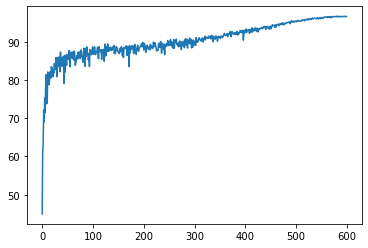

In [32]:
pdarts_train = get_valid_acc('./PDARTS/begin/log.txt')
plt.plot(pdarts_train, label='pdarts')
max(pdarts_train)

In [35]:
geno_file = 'PC-DARTS/genotypes.py'
geno = open(geno_file, 'r')

genotypes = []
for line in geno.readlines():
    match = re.findall('.* = Genotype\(normal=.*\)', line)
    if match:
        arch = match[0].split(' = ')
        arch_name, arch_type = arch[0], arch[1]
        arch_type = re.findall(r'\(\'(\w*)\'', arch_type)
        arch_type = {e:arch_type.count(e) for e in arch_type}
        genotypes.append((arch_name, arch_type))
        
genotypes

[('DARTS_V1',
  {'sep_conv_3x3': 5,
   'skip_connect': 6,
   'max_pool_3x3': 4,
   'avg_pool_3x3': 1}),
 ('DARTS_V2',
  {'sep_conv_3x3': 5,
   'skip_connect': 5,
   'dil_conv_3x3': 1,
   'max_pool_3x3': 5}),
 ('PC_DARTS_cifar',
  {'sep_conv_3x3': 7,
   'skip_connect': 1,
   'dil_conv_3x3': 2,
   'sep_conv_5x5': 4,
   'avg_pool_3x3': 1,
   'max_pool_3x3': 1}),
 ('PC_DARTS_image',
  {'skip_connect': 3,
   'sep_conv_3x3': 9,
   'dil_conv_5x5': 2,
   'max_pool_3x3': 1,
   'sep_conv_5x5': 1}),
 ('begin_unroll',
  {'skip_connect': 3,
   'sep_conv_3x3': 7,
   'max_pool_3x3': 2,
   'dil_conv_5x5': 2,
   'sep_conv_5x5': 2})]

In [6]:
geno_file = "/home/yuezx/NAS-Benchmark/DARTS_LBJ/fgsm_original/log.txt"
geno = open(geno_file, 'r')

genotypes = []
for line in geno.readlines():
    match = re.findall('.* = Genotype\(normal=.*\)', line)
    if match:
        arch = match[0].split(' = ')
        arch_name, arch_type = arch[0], arch[1]
        arch_type = re.findall(r'\(\'(\w*)\'', arch_type)
        arch_type = {e:arch_type.count(e) for e in arch_type}
        genotypes.append((arch_name, arch_type))
        
genotypes

[('2020-10-30 13:36:11,678 genotype',
  {'max_pool_3x3': 2,
   'dil_conv_3x3': 4,
   'avg_pool_3x3': 5,
   'sep_conv_3x3': 2,
   'sep_conv_5x5': 1,
   'skip_connect': 1,
   'dil_conv_5x5': 1}),
 ('2020-10-30 14:00:23,310 genotype',
  {'max_pool_3x3': 8, 'skip_connect': 2, 'avg_pool_3x3': 6}),
 ('2020-10-30 14:25:14,115 genotype',
  {'max_pool_3x3': 8, 'skip_connect': 2, 'avg_pool_3x3': 6}),
 ('2020-10-30 14:49:29,349 genotype',
  {'max_pool_3x3': 8, 'skip_connect': 2, 'avg_pool_3x3': 6}),
 ('2020-10-30 15:14:36,230 genotype',
  {'max_pool_3x3': 8, 'skip_connect': 2, 'avg_pool_3x3': 6}),
 ('2020-10-30 15:39:34,589 genotype',
  {'max_pool_3x3': 8, 'skip_connect': 2, 'avg_pool_3x3': 6}),
 ('2020-10-30 16:04:23,599 genotype',
  {'max_pool_3x3': 8, 'skip_connect': 2, 'avg_pool_3x3': 6}),
 ('2020-10-30 16:29:08,769 genotype',
  {'max_pool_3x3': 8, 'skip_connect': 2, 'avg_pool_3x3': 6}),
 ('2020-10-30 16:54:01,333 genotype',
  {'max_pool_3x3': 8, 'skip_connect': 2, 'avg_pool_3x3': 6}),
 ('202

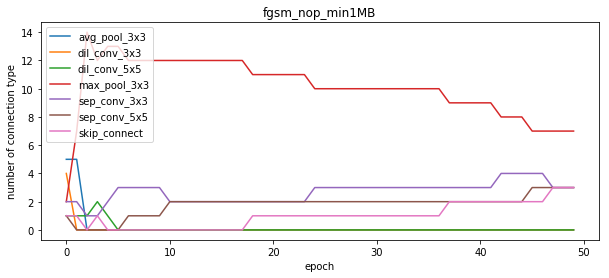

In [86]:
def plot_epoch_geno(geno_file, title=''):
    geno = open(geno_file, 'r')

    genotypes = []
    for line in geno.readlines():
        match = re.findall('.* = Genotype\(normal=.*\)', line)
        if match:
            arch = match[0].split(' = ')
            arch_name, arch_type = arch[0], arch[1]
            arch_type = re.findall(r'\(\'(\w*)\'', arch_type)
            arch_type = {e:arch_type.count(e) for e in arch_type}
            genotypes.append((arch_name, arch_type))
            
    data = []
    for t, d in genotypes:
        data.append(d)

    df = pd.DataFrame(data=data)
    df = df.fillna(0)

    plt.figure(figsize=(10,4))
    plt.plot(df)
    plt.legend(df.columns)
    plt.ylabel('number of connection type')
    plt.xlabel('epoch')
    plt.title(title)
    plt.show()
    
plot_epoch_geno("/home/yuezx/NAS-Benchmark/DARTS_LBJ/fgsm_nop_min/log.txt", 'fgsm_nop_min1MB')

In [ ]:
def plot_loss_sol(path):
    N = int(25000/64)
    acc_loss = []
    nop_loss = []
    data = np.load(os.path.join(path, 'loss_data.npy'))
    for d in data:
        acc_loss.append(d['acc'])
        nop_loss.append(d['nop'])
    
    acc_loss = np.convolve(acc_loss, np.ones((N,))/N, mode='valid')[::N]
    nop_loss = np.convolve(nop_loss, np.ones((N,))/N, mode='valid')[::N]
    
    plt.figure(figsize=(10,5))
    plt.subplot(121)
    plt.plot(acc_loss, label='acc')
    plt.plot(nop_loss, label='nop')
    plt.legend()
    plt.xlabel('epoch')
    plt.ylabel('loss')
    
    sols = np.load(os.path.join(path, 'sols.npy'))[::N]
    plt.subplot(122)
    plt.plot(sols[:,0], label='acc', alpha=0.5)
    plt.plot(sols[:,1], label='param', alpha=0.5)
    plt.xlabel('step')
    plt.ylabel('weight')
    plt.legend()
    
def plot_alpha(path):
    alphas_reduce = np.load(os.path.join(path, 'alphas_reduce.npy'))[0]
    alphas_normal = np.load(os.path.join(path, 'alphas_normal.npy'))[0]
    plt.figure(figsize=(10,5))
    plt.subplot(121)
    plt.title('alphas_reduce')
    sns.heatmap(alphas_reduce, annot=True, fmt ='.2f', cmap="YlGnBu", cbar=False)
    plt.subplot(122)
    plt.title('alphas_normal')
    sns.heatmap(alphas_normal, annot=True, fmt ='.2f', cmap="YlGnBu", cbar=False)

def plot_entropy(path, temperature='A'):
    alphas_normal = np.load(os.path.join(path, 'alphas_normal.npy'))
    alphas_reduce = np.load(os.path.join(path, 'alphas_reduce.npy'))
    alphas_normal_entropys = []
    alphas_reduce_entropys = []

    for epoch in alphas_normal:
        alphas_normal_entropys.append(entropy(epoch).mean())

    for epoch in alphas_reduce:
        alphas_reduce_entropys.append(entropy(epoch).mean())
    
    if temperature=='A':
        tau = [1 / 2**(epoch//10) for epoch in range(50)]
    elif temperature=='B':
        tau = [1 if epoch<10 else 0.1 for epoch in range(50)]
    elif temperature=='C':
        tau = [1 / 10**(epoch//10) for epoch in range(50)]
    elif temperature=='D':
        tau = [1 if epoch<10 else 0.00001 for epoch in range(50)]
    elif temperature=='none':
        tau = [1] * 50

    fig, ax_f = plt.subplots()
    ax_c = ax_f.twinx()
    ax_f.plot(alphas_normal_entropys, label='alphas_normal')
    ax_f.plot(alphas_reduce_entropys, label='alphas_reduce')
    ax_c.plot(tau, 'r-', label='tau')

    ax_f.set_xlabel('epoch')
    ax_f.set_ylabel('entropy')
    ax_c.set_ylabel('tau')
    fig.legend()

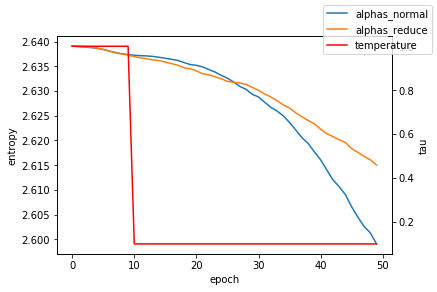

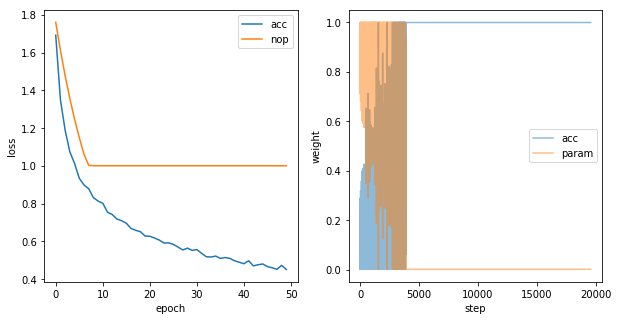

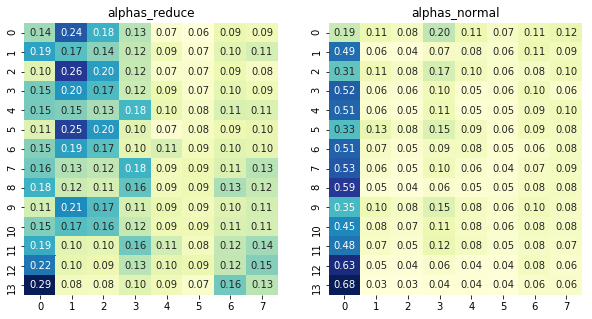

In [86]:
path = '/home/yuezx/NAS-Benchmark/DARTS/inner_acc1_outer_nop_mgda_min_temperature0.1/'
plot_entropy(path, temperature='B')
plot_loss_sol(path)
plot_alpha(path)

In [ ]:
path = '/home/yuezx/NAS-Benchmark/DARTS/inner_acc1_outer_nop_mgda_min/'
# plot_entropy(path, temperature='none')
# plot_loss_sol(path)
plot_alpha(path)

In [4]:
path = 'DARTS/inner_acc1_outer_nop_mgda_tempA'
data = np.load(os.path.join(path, 'loss_data.npy'))
nop_loss = []
for d in data:
#     acc_loss.append(d['acc'])
    nop_loss.append(d['nop'])

In [8]:
data = np.load(os.path.join(path, 'sols.npy'))[:,1]

In [10]:
plt.plot(data)

In [25]:
data = np.load("/home/yuezx/NAS-Benchmark/DARTS/warmStart_inner_acc1_outer_nop_mgda_tempA/sols.npy")
data.shape

(19550,)

In [27]:
sols = []
for l in data:
    if len(l)>1:
        sols.append(l)
np.array(sols)

array([[1.   , 0.   ],
       [1.   , 0.   ],
       [1.   , 0.   ],
       ...,
       [0.999, 0.001],
       [0.999, 0.001],
       [0.999, 0.001]])

In [28]:
data

array([list([1, 0]), list([1, 0]), list([1, 0]), ...,
       array([0.999, 0.001]), array([0.999, 0.001]),
       array([0.999, 0.001])], dtype=object)